# Pandas part 2: Data types and missing values

Notebook developed by Sam Maurer

In [1]:
import numpy as np
import pandas as pd

## 1. Working with data types

Python and Pandas will automatically assign appropriate types to your data.

In [2]:
df = pd.DataFrame({'x': [1.4, 5.98, 12.0, 0], 
                   'y': [17, 40, 52, 0], 
                   'z': ['tall', 'tall', 'tall', 'small']})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
x    4 non-null float64
y    4 non-null int64
z    4 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 176.0+ bytes


("Object" is what Pandas calls anything that's not numeric.)

You can convert types like this:

In [4]:
df['x'].astype('int')

0     1
1     5
2    12
3     0
Name: x, dtype: int64

Reminder that when you apply a function to a Series or DataFrame, Python will calculate the result, but generally _not save it anywhere_ unless you use an `=` to assign the values to a new or existing variable/column.

A data type of `int64` means integers with 64 bits of precision, which supports up to 19 decimal digits or so. The default bit precision varies from platform to platform, so it's safer to refer to generic types like `int` in your code, rather than specific ones, unless you have a good reason.

## 2. Working with missing values

The standard way to denote a missing value in the Python data science world is with NumPy's `np.nan` object. 

In [5]:
df = pd.DataFrame({'x': [1.4, 5.98, np.nan, 0], 
                   'y': [17, 40, 52, -1]})

In [6]:
df

,x,y
0,1.40,17
1,5.98,40
2,NaN,52
3,0.00,-1


As you will recall from lecture, integers can't be missing! Mixing a NaN with integers  will cause Pandas to convert the whole column in to floating-point values. (This is not the end of the world, but generally better to avoid.)

When you're loading data, a nice workflow is to leave the missing values in place, and just filter the rows so you can focus on the valid observations. This is similar to the approach we used with columns in the last demo.

All the rows where "x" is not missing:

In [7]:
df.loc[df['x'].notnull()]

,x,y
0,1.40,17
1,5.98,40
3,0.00,-1


How does this work, exactly? The logical statements you write inside the square brackets generate a boolean "mask" specifying which rows to include and which to drop.

When you pass the mask to `df.loc[]`, it returns the relevant subset of rows.

Here's what a mask looks like:

In [8]:
df['x'].isnull()  # converse of .notnull()

0    False
1    False
2     True
3    False
Name: x, dtype: bool

Suppose a value of y = -1 indicates a missing value in the integer column.

Here's how to filter those rows out:

In [9]:
df.loc[df['y'] != -1]  # '!=' means 'not equal'

,x,y
0,1.40,17
1,5.98,40
2,NaN,52


Combining two expresions to filter out all the incomplete observations:

In [10]:
df.loc[df['x'].notnull() & 
       (df['y'] != -1)]

,x,y
0,1.40,17
1,5.98,40


There are not very many shortcuts for combining filter expressions, but one that can be useful is the `.isin()` function:

In [11]:
df.loc[df['y'].isin([17, 52])]

,x,y
0,1.4,17
2,NaN,52


All the comparison operators in one place:

- `==` "equals" (because `=` assigns values)
- `!=` "does not equal" 
- `&` "and"
- `|` "or"
- `~` "not"
- `<` "less than"
- `<=` "less than or equal to
- `>` "greater than"
- `>=` "greater than or equal to

## 3. Using filters to edit data

Occasionally you'll want to change specific cell values in a DataFrame.

The syntax for this is a bit different from what we've been doing -- you need to ask for a specific set of rows, but also a specific column.

Inside the square brackets, instead of `[expression]`, you use `[expression, colname]`:

In [12]:
df.loc[df['y'] == -1, 'y'] = 999  # '==' tests equality, '=' assigns a value

In [13]:
df

,x,y
0,1.40,17
1,5.98,40
2,NaN,52
3,0.00,999


## 4. A syntax shorthand for referring to columns

Syntax like `df['y']` is hard to type. In most cases, you can use `df.y` instead!

In [14]:
df.y

0     17
1     40
2     52
3    999
Name: y, dtype: int64

Rules for using the shorthand:

1. The column must exist already.

2. The column name must be valid as a Python variable. No spaces, hyphens, or "reserved keywords" like names of built-in DataFrame functions. 

In [15]:
df[df.y > 5]

,x,y
0,1.40,17
1,5.98,40
2,NaN,52
3,0.00,999


## Exercises

### a. Identifying data types

Load the Zillow DataFrame from `pandas-part-1`.

What data type do the median rent columns have? Does this make sense? Why is it happening?

In [16]:
url = "http://files.zillowstatic.com/research/public/Metro/Metro_MedianRentalPrice_2Bedroom.csv"
df = pd.read_csv(url)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Columns: 122 entries, RegionName to 2019-12
dtypes: float64(120), int64(1), object(1)
memory usage: 366.1+ KB


### b. Converting data types and filtering missing values

Let's look at the `2010-08` column. First, plot a histogram of it.

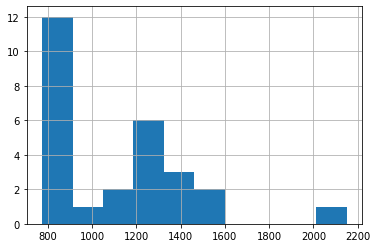

In [22]:
df['2010-08'].hist()

  Now, try to convert the column to integers. Does it work? If not, try converting the NaNs to "indicator values" first.

In [24]:
df['2010-08'].replace(np.nan, 0, inplace = True)

Plot a histogram of the integer version of the column, making sure to filter out the missing values.

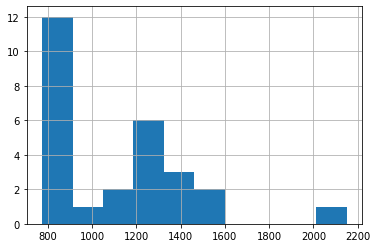

In [27]:
df[df['2010-08'] != 0]['2010-08'].hist()

### c. Column naming

Add a column to the DataFrame column named "mean".

What happens if you try to refer to it as `df.mean`? Why?

In [28]:
df['mean'] = 0

In [30]:
df.mean()

SizeRank     191.500000
2010-01      795.000000
2010-02     1131.166667
2010-03     1124.166667
2010-04     1125.833333
2010-05     1129.772727
2010-06     1138.500000
2010-07     1108.730769
2010-08       78.286458
2010-09     1029.569444
2010-10     1069.046512
2010-11     1067.313953
2010-12     1045.627660
2011-01      929.013889
2011-02      936.609756
2011-03      953.696429
2011-04      969.380952
2011-05      981.500000
2011-06      968.836735
2011-07      946.901869
2011-08      936.884956
2011-09      921.918033
2011-10      905.421875
2011-11      902.019231
2011-12      903.981061
2012-01      907.900000
2012-02      912.834559
2012-03      925.682482
2012-04      916.456835
2012-05      918.823741
               ...     
2017-08     1004.123418
2017-09     1001.376562
2017-10     1004.487692
2017-11     1009.263720
2017-12     1008.283988
2018-01     1009.010511
2018-02     1016.495536
2018-03     1033.647826
2018-04     1048.426301
2018-05     1050.011494
2018-06     1052

It does work becuase mean is a built-in function of a dataframe, whic returns the mean values of each column. i might suggest to change the name of the column or using with the following syntax to call the column: df['mean'] instead of df.mean 